In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import tweets_utils
import json
# import networkx as nx
import seaborn as sns
# import re
# from operator import itemgetter
# import matplotlib.cm as mcm
# import community
# from community import community_louvain as cm
# import leidenalg as la
# import igraph as ig
# from cdlib import algorithms
warnings.filterwarnings('ignore')
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Network Script](#script)


- [Network](#network)

    - [Netwrok info](#info)
    - [Load files](#load)
    
    
- [Communities](#communities)
    
    - [Disinform Dozen and community](#dozen_comm)
    - [Good Dozen and community](#good_comm)
    - [Top communities](#top_commm)

# Network Script
<a id="script"/>

In [ ]:
retweets_graph = nx.from_pandas_edgelist(df,'name','rt_name', create_using=nx.DiGraph())
print(nx.info(retweets_graph)) #da ritornare le info
#-----------------------------------------------------------------
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
#### Communities with Louvain modularity
retweets_graph_und = nx.from_pandas_edgelist(df,'name','rt_name')
print(nx.info(retweets_graph_und)) #da ritornare 
#-----------------------------------------------------------------
best_part = cm.best_partition(retweets_graph_und, random_state=42) #da ritornare il best part
#-----------------------------------------------------------------
#### Communities with Leiden (opzionale, se riesci)
tuples = [tuple(x) for x in df_rt.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
#da ritornare
#-----------------------------------------------------------------
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
#da ritornare
#-----------------------------------------------------------------
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
partition
#da ritornare

# Network
<a id="network"/>

### Nx info
<a id="info"/>
<p>
    
    Type: DiGraph
    Number of nodes: 12513502
    Number of edges: 40027282
    Average in degree: 3.1987
    Average out degree: 3.1987
    
</p>

### Load files
<a id="load"/>

In [2]:
path_degrees = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network/*degree*.json")
path_degrees

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\degree.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\in_degree.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\out_degree.json']

In [3]:
path_communities = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network/*communities*.json")
path_communities

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\leiden_communities.json',
 'C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/rt_network\\louvain_communities.json']

In [4]:
start_time = time.perf_counter()
file = open (path_degrees[0],)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  16.1185445


In [5]:
start_time = time.perf_counter()
file = open (path_degrees[1],)
in_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  25.49214769999999


In [6]:
start_time = time.perf_counter()
file = open (path_degrees[2],)
out_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  112.72753800000001


In [7]:
start_time = time.perf_counter()
file = open (path_communities[0],)
leiden = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  3.057021000000077


In [7]:
start_time = time.perf_counter()
file = open (path_communities[1],)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  23.727270199999964


# Communities
<a id="communities"/>

In [8]:
path_ccdh = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")

In [9]:
ccdh_rt = pd.read_csv(path_ccdh[0] + "retweet_users_ccdh.csv")

In [10]:
ccdh_rt_flt = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain])]

In [11]:
total_users = len(louvain)
total_rt_ccdh = len(ccdh_rt)
found = len(ccdh_rt_flt)

In [12]:
cont = 0
for i in louvain:
    if(louvain.get(i) == 2):
        cont = cont + 1

In [48]:
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
# disinform

### Disinform Dozen and community
<a id="dozen_comm"/>

In [51]:
for i in louvain:
    if i in list(disinform["screen_name"]):
        print(f"Name: {i}, Community: {louvain.get(i)}")

Name: unhealthytruth, Community: 2
Name: BusyDrT, Community: 2
Name: RobertKennedyJr, Community: 2
Name: mercola, Community: 2
Name: kevdjenkins1, Community: 2
Name: DrChrisNorthrup, Community: 2
Name: DrButtar, Community: 2


### Good Dozen and community
<a id="good_comm"/>


In [52]:
file_verified = ["DrDenaGrayson", "MackayIM", "DrEricDing", "IlonaKickbusch", "ashishkjha", 
                 "HelenBranswell", "mlipsitch", "trvrb", "kakape", "edyong209", "CDCDirector",
                "DrTedros"]
for i in louvain:
    if i in list(file_verified):
        print(f"Name: {i}, Community: {louvain.get(i)}")

Name: trvrb, Community: 2
Name: CDCDirector, Community: 2
Name: MackayIM, Community: 2
Name: DrTedros, Community: 19
Name: IlonaKickbusch, Community: 2
Name: DrEricDing, Community: 2
Name: kakape, Community: 2
Name: DrDenaGrayson, Community: 1
Name: ashishkjha, Community: 1
Name: mlipsitch, Community: 2
Name: edyong209, Community: 1
Name: HelenBranswell, Community: 1


In [18]:
communities = []
for i in louvain:
    communities.append(louvain.get(i))
# communities = pd.Series(communities).unique()
# len(communities)
communities = pd.Series(communities).value_counts().sort_values(ascending=False)


### Top communities
<a id="top_commm"/>

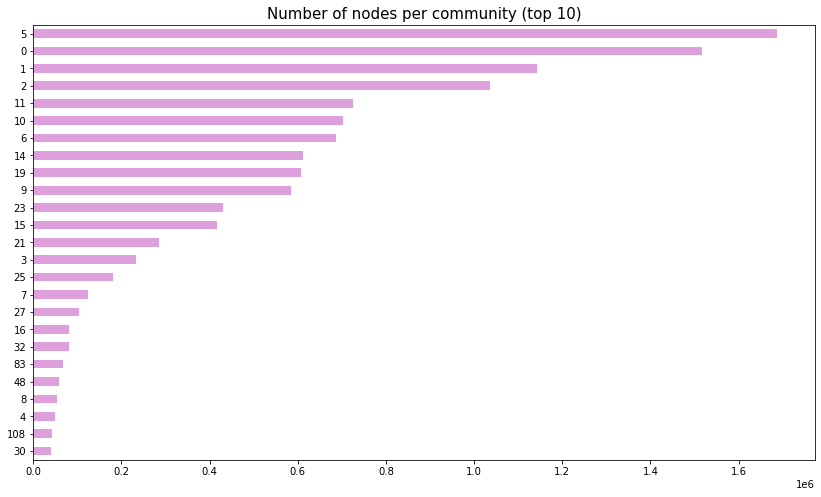

In [22]:
val = communities
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

### Stats

In [39]:
print(f"Utenti che retweettano i Dozen presenti nella Network: {round((found/total_rt_ccdh)*100,2)}%")
print(f"Che rappresentano il: {round((found/total_users)*100,2)}% della network")
print(f"e rappresentano il: {round((found/cont)*100,2)}% della Community numero 2")

Utenti che retweettano i Dozen presenti nella Network: 48.48%
Che rappresentano il: 0.15% della network
e rappresentano il: 1.86% della Community numero 2


In [15]:
rt = []
start_time = time.perf_counter()
for i in ccdh_rt_flt["user_screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  0.07087520000004588


In [18]:
community = []
name = []
for i in range(len(rt)):
    community.append(rt[i][1])

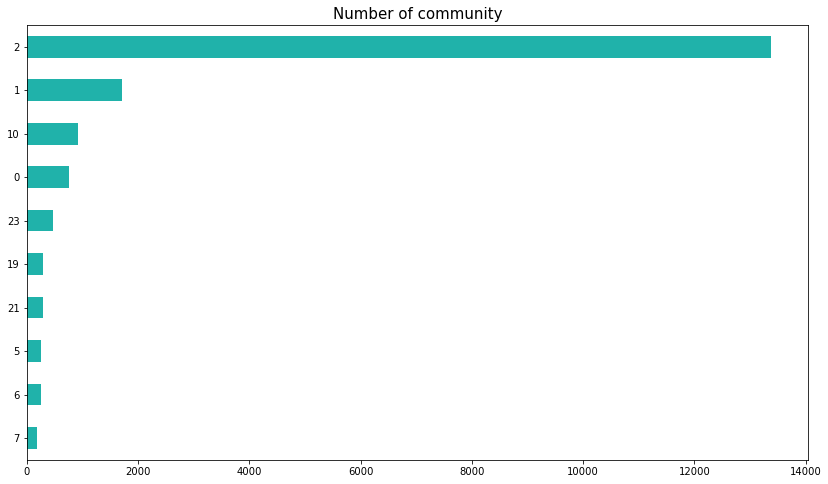

In [19]:
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of community', fontsize=15)
ax.invert_yaxis()
plt.show()

- interazioni con le altre community
- se i dozen ne fanno parte
- caratterizzazione community
- prendi rt di un gruppo e vedi quanti hanno come altro nodo della rete un gruppo all'interno della propria community
    - prime 5, caratterizza (community seguaci, community alto verified, ...)

### Community interaction

In [47]:
print("In degree: ")
for i in in_degree[:10000]:
    if i[0] in file_verified:
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")
print("----------------------")
print("Out degree: ")
for i in out_degree[:10000]:
    if i[0] in file_verified:
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")

In degree: 
good: ['DrDenaGrayson', 32737]
good: ['DrTedros', 26854]
good: ['DrEricDing', 23985]
good: ['trvrb', 5936]
good: ['MackayIM', 4291]
good: ['kakape', 3419]
good: ['edyong209', 2810]
good: ['CDCDirector', 2705]
good: ['mlipsitch', 1885]
disinform: ['BusyDrT', 1274]
good: ['HelenBranswell', 1018]
good: ['ashishkjha', 637]
disinform: ['RobertKennedyJr', 579]
----------------------
Out degree: 
good: ['IlonaKickbusch', 233]
good: ['MackayIM', 171]
